In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

### **Transformation of Features**

**Why Transformation of Features Are Required?**

**Transformation of Features** refers to the process of modifying or manipulating the existing features or variables in a dataset to improve the performance of a machine learning algorithm.



-  `Linear Regression` --- `Gradient Descent` ---- `Global Minima`
    - **For example**, in Linear Regression, which uses gradient descent to find the global minima, it is crucial to transform the features to meet the assumptions of linearity, independence, and equal variance.

- Algorithms like `KNN`, `K Means`,`Hierarichal Clustering`--- `Eucledian Distance`.
    - Similarly, certain algorithms like `K-nearest neighbors (KNN)`, `K-means clustering`, and `hierarchical clustering` rely on calculating distances between data points. In these cases, feature transformation can help to normalize the scale and range of the features, such as using techniques like `Euclidean distance`, so that the algorithm can effectively measure the similarity or dissimilarity between the points.


Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling)
1. ANN ---> GLobal Minima, Gradient
2. CNN
3. RNN

When it comes to deep learning techniques, such as artificial neural networks (ANN), convolutional neural networks (CNN), and recurrent neural networks (RNN), feature transformation is also important. Techniques like standardization and scaling are commonly applied to ensure that the features have a similar range or distribution, which aids in the optimization process, finding global minima, and handling gradient-related issues during training.

- `0-255 pixels`
    -  common range of pixel values in image data, where images are represented by a grid of pixels, and each pixel can have a value ranging from 0 (black) to 255 (white). In image processing tasks, feature engineering may involve additional transformations specific to image data, such as resizing, cropping, or applying filters.

Overall, feature selection and feature engineering, including the transformation of features, play a crucial role in preparing the data for machine learning algorithms, improving their performance, and ensuring that the data meets the requirements of the chosen algorithms.

## Types Of Transformation

1. `Normalization` And `Standardization`
2. Scaling to `Minimum` And `Maximum` values
3. Scaling To `Median` And `Quantiles`
4. `Guassian Transformation`
5. `Logarithmic Transformation`
6. `Reciprocal Trnasformation`
7. `Square Root Transformation`
8. `Exponential Trnasformation`
9. `Box Cox Transformation`

### Standardization

**Why standardization?**

Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
$$z=\frac{(x-x_{mean})}{std}$$

In [2]:
dataset_url = "https://raw.githubusercontent.com/mohd-faizy/feature-engineering-hacks/main/_dataset/titanic.csv"

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import the dataset
df = pd.read_csv(dataset_url, usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

# Fill missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df.isnull().sum())
print("\n")

# Independent and dependent features
X = df.drop('Survived', axis=1)
y = df['Survived']

print("Shape before split:")
print(X.shape, y.shape)
print("\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Shape after split:")
print(X_train.shape, y_train.shape)
print("\n")

# Standardization: Use the StandardScaler from sklearn library
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
classification = LogisticRegression()
classification.fit(X_train_scaled, y_train)

# Predict the output for the testing data
predictions = classification.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\n")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)
print("\n")

# Calculate classification report
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64


Shape before split:
(891, 3) (891,)


Shape after split:
(623, 3) (623,)


Accuracy: 0.6791044776119403


Confusion Matrix:
[[138  27]
 [ 59  44]]


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       165
           1       0.62      0.43      0.51       103

    accuracy                           0.68       268
   macro avg       0.66      0.63      0.63       268
weighted avg       0.67      0.68      0.66       268



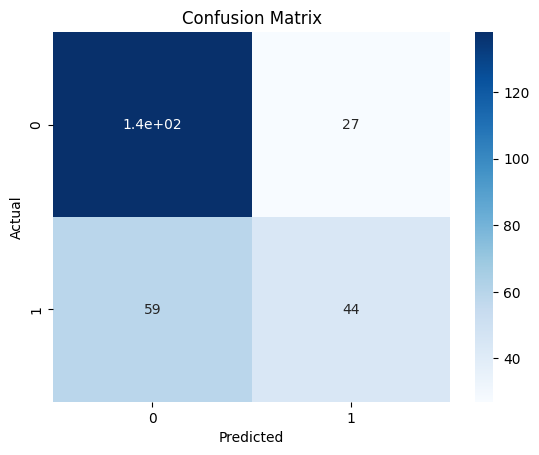

In [4]:
import seaborn as sns

# Plot confusion matrix heatmap
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Min Max Scaling

`Min-Max` Scaling scales the values between `0` to `1`.

$$X_{scaled} = \frac{(X - X_{min})}{(X_{max} - X_{min})}$$

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import the dataset
df = pd.read_csv(dataset_url, usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

# Fill missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df.isnull().sum())
print("\n")

# Independent and dependent features
X = df.drop('Survived', axis=1)
y = df['Survived']

print("Shape before split:")
print(X.shape, y.shape)
print("\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Shape after split:")
print(X_train.shape, y_train.shape)
print("\n")

# Min-max scaling: Use the MinMaxScaler from sklearn library
scaler = MinMaxScaler()

# Fit and transform the training data
#  & Transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
classification = LogisticRegression()
classification.fit(X_train_scaled, y_train)

# Predict the output for the testing data
predictions = classification.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\n")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)
print("\n")

# Calculate classification report
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64


Shape before split:
(891, 3) (891,)


Shape after split:
(623, 3) (623,)


Accuracy: 0.6977611940298507


Confusion Matrix:
[[140  25]
 [ 56  47]]


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       165
           1       0.65      0.46      0.54       103

    accuracy                           0.70       268
   macro avg       0.68      0.65      0.66       268
weighted avg       0.69      0.70      0.68       268



### **Robust Scaler**

Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles

Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

- **IQR** = $75^{th} quantile$ - $25^{th} quantile$

$$X_{scaled} = \frac{(X - X_{median})}{IQR}$$

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import the dataset
df = pd.read_csv(dataset_url, usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

# Fill missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df.isnull().sum())
print("\n")

# Independent and dependent features
X = df.drop('Survived', axis=1)
y = df['Survived']

print("Shape before split:")
print(X.shape, y.shape)
print("\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

print("Shape after split:")
print(X_train.shape, y_train.shape)
print("\n")

# Robust scaling: Use the RobustScaler from sklearn library
scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a random forest classifier
classification = RandomForestClassifier()
classification.fit(X_train_scaled, y_train)

# Predict the output for the testing data
predictions = classification.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\n")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)
print("\n")

# Calculate classification report
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64


Shape before split:
(891, 3) (891,)


Shape after split:
(596, 3) (596,)


Accuracy: 0.6406779661016949


Confusion Matrix:
[[139  43]
 [ 63  50]]


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       182
           1       0.54      0.44      0.49       113

    accuracy                           0.64       295
   macro avg       0.61      0.60      0.60       295
weighted avg       0.63      0.64      0.63       295



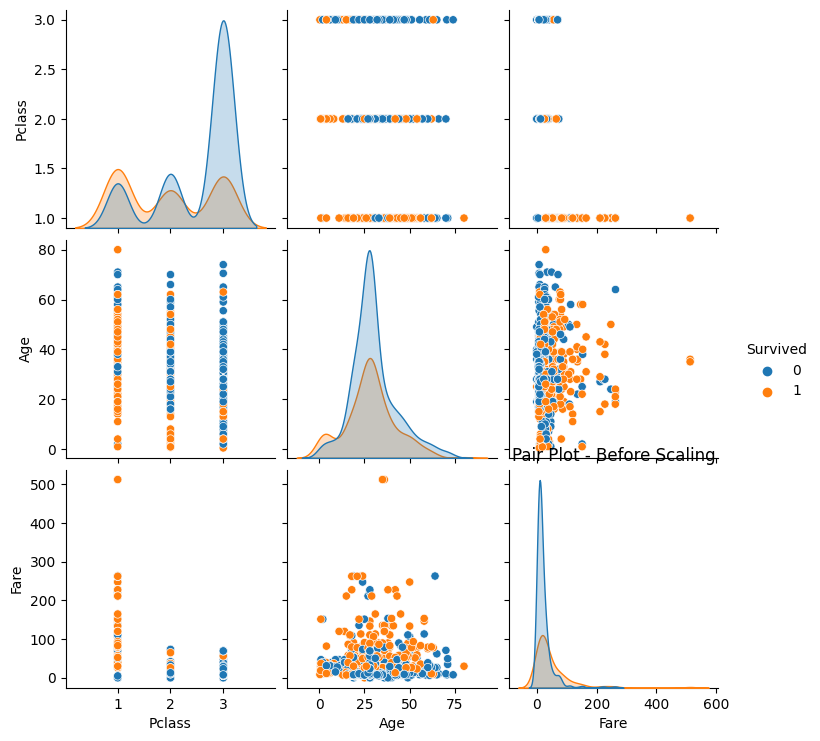

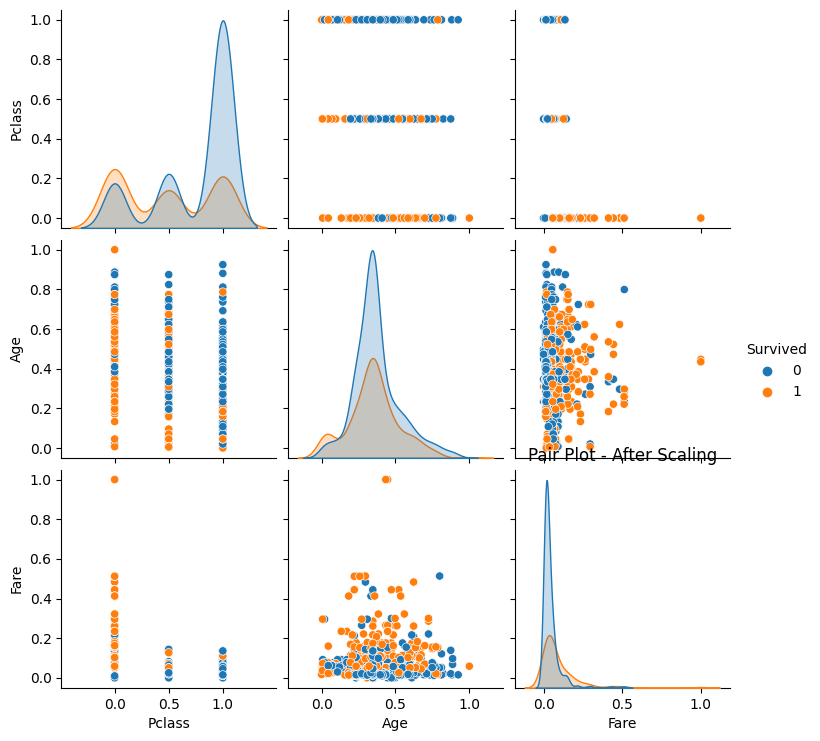

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv(dataset_url, usecols=['Pclass', 'Age', 'Fare', 'Survived'])

# Fill missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Independent and dependent features
X = df.drop('Survived', axis=1)
y = df['Survived']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the 'Survived' column back to the scaled DataFrame
df_scaled['Survived'] = y

# Plotting pair plot before scaling
sns.pairplot(df, hue='Survived')
plt.title('Pair Plot - Before Scaling')
plt.show()
print("\n")

# Plotting pair plot after scaling
sns.pairplot(df_scaled, hue='Survived')
plt.title('Pair Plot - After Scaling')
plt.show()


### **Gaussian transformation**

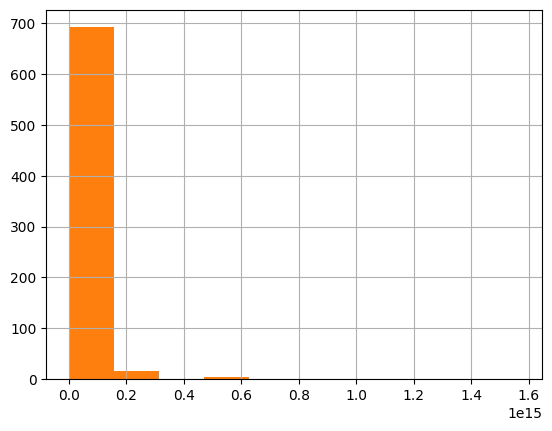

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the Titanic dataset
df = pd.read_csv(dataset_url)

# Select a variable for transformation, such as 'Age'
variable = 'Age'

# Check the distribution of the variable
df[variable].hist()

# Apply Box-Cox transformation
transformed_variable, lamb = stats.boxcox(df[variable])

# Check the transformed distribution
pd.Series(transformed_variable).hist()

# Assign the transformed variable back to the dataframe
df[variable] = transformed_variable